# Hammurabi with hampy:  a quick start guide:

First, set your PYTHONPATH variable to the hampy directory, e.g.,

setenv PYTHONPATH /path/to/hammurabi/hampy/

or equivalent.  (If you didn't do this before starting jupyter, you'll have to quit, set it, and then restart.)  

Import the necessary libraries:

In [1]:
import hampy
import healpy as hp
import matplotlib
from pylab import cm
%matplotlib inline
#  The color tables on different systems
#   which is annoying.  Set it explicitly:
cmap=cm.get_cmap('jet')
cmap.set_under('w')

Setup and run a simple instance of hammurabi:

In [2]:
#  Initialize the hammurabi object with the default parameters:
ham=hampy.Hampy()
#  Call the hammurabi executable:
ham.call()
#  Prints '...' while it's running.  When it finishes, it 
#  prints its return status, which should be 0 if successful:

.................

0

Note that the hampy module sets defaults for hammurabi that are not the same as the defaults in the executable itself.  They are set in hampy to be convenient for these test notebooks, while the executable defaults remain what they were before and will not change (to avoid breaking all my unit tests).  

If you want to run hammurabi from the command line exactly as in some of these examples, then run the hampy example and then copy the params.txt file that will be written in the working directory.  That will include all parameters given to the executable, even those you do not set (or even see in many cases) in these examples. 

In [3]:
# You can look at the log with ham.print_log(), which prints
#  the full log if nothing specified, but this can be long.  
#  You can look at the end of the log with, e.g., 
ham.print_log(-10)

[2017-03-22T14:14:41]   Current shell interval is [7.5 , 15]
[2017-03-22T14:14:43]  integrate2obs_maps:   shell number 3 at NSIDE 128
[2017-03-22T14:14:43]   Current shell interval is [15 , 30]
[2017-03-22T14:14:46]  integrate2obs_maps: integrate2obs_maps() finished 
File /Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/IQU_sync.fits exists;  removing.
[2017-03-22T14:14:46]  save_maps2file:  obs map saved to /Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/IQU_sync.fits
File /Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/rm.fits exists;  removing.
[2017-03-22T14:14:46]  save_maps2file:  obs map saved to /Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/rm.fits
[2017-03-22T14:14:46]   Finishing the Hammurabi code


Get the observables from where they were written as FITS files in default locations in the working directory.  They will be stored in a dictionary of maps with keys:  Is, Qs, and Us for synchrotron;  Id, Qd, and Ud for dust;  RM;  DM;  ff; and tau.  By default, only synchrotron and RM were produced in the above run, so we look at those with:

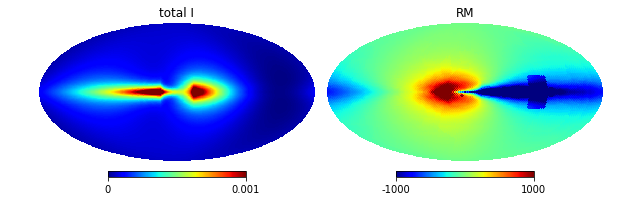

In [4]:
#  Gets the maps from the default locations
maps=ham.get_observables()
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
hp.mollview(maps['Is'],min=0,max=0.001,sub=(2,2,1),title="total I",cmap=cmap)
hp.mollview(maps['RM'],min=-1000,max=1000,sub=(2,2,2),title='RM',cmap=cmap)

# Modifying parameters:

This was a simple axi-symmetric spiral with no turbulence. Let's look at the current paramters:

In [5]:
ham.get_params()

{'B_field_do_random': 'F',
 'B_field_nx': 128,
 'B_field_ny': 128,
 'B_field_nz': 26,
 'B_field_seed': '1486647502',
 'B_field_type': '1',
 'B_ran_mem_lim': '4',
 'TE_grid_filename': 'test/negrid_n400.bin',
 'TE_nx': '400',
 'TE_ny': '400',
 'TE_nz': '80',
 'do_dm': 'F',
 'do_dust': 'F',
 'do_ff': 'F',
 'do_rm': 'T',
 'do_sync_emission': 'T',
 'do_tau': 'F',
 'max_radius': '30',
 'obs_DM_file_name': '/Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/dm.fits',
 'obs_NSIDE': '128',
 'obs_RM_file_name': '/Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/rm.fits',
 'obs_dust_file_name': '/Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/IQU_dust.fits',
 'obs_ff_file_name': '/Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/free.fits',
 'obs_file_name': '/Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/test.out/IQU_sync.fits',
 'obs_freq_GHz': '23',
 'obs_map_overwrite': 'T',
 'obs_shell_index_numb': '3',
 'obs_tau

This shows what parameters are stored in the object. There are a number of ways to set the parameters you want.  Note also that by default, it names all files with default names and places them in a directory, ./test.out.  You can of course change the output file names individually, but it's easier to simply change the output directory for different runs.

Now, to change parameters:

1)  The first way to change the defaults is on initialization.  Here, we turn on the random component:

In [6]:
#  Initialize the hammurabi object while replacing one of the 
#   default parameters.  It takes a dictionary of key-value 
#   pairs.  We also change the output directory.
ham=hampy.Hampy(custom_parameters={"B_field_do_random":"T"},working_directory='./test.out2')
#  Call the hammurabi executable:
ham.call()

......................

0

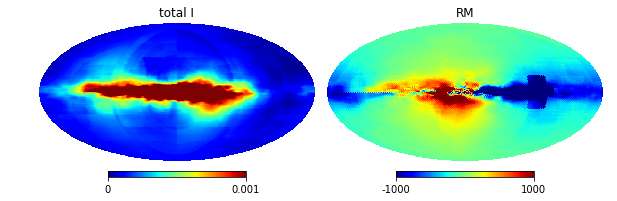

In [7]:
maps=ham.get_observables()
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
hp.mollview(maps['Is'],min=0,max=0.001,sub=(2,2,1),title="total I",cmap=cmap)
hp.mollview(maps['RM'],min=-1000,max=1000,sub=(2,2,2),title='RM',cmap=cmap)

2)  Alternatively, you can use the same hammurabi object, clean up a previous run, and change a parameter at the time of the call.  This means, you still have the original defaults, the parameter changed at initialization (in this case turning on the random component), and now you modify a few more parameters.  Note that this DOES accumulate.  If you do only ham.call() again, you will still have the parameters you specified in the previous ham.call(custom_parameters={...})

In [8]:
#  Call it again, replacing some of the other parameters:
#ham.cleanup()  
#
ham.call({"B_field_nx":"512","B_field_nx":"512","B_field_nx":"103"})

......................

0

3)  You can also give the object a parameter file that you already have on disk, and they will be read in.  This is an example of a box containing an SNR simulation integrated over only a patch of the sky with the result written to a list.  (See the notebook on the hampy viewers for how to look at the results.)

In [ ]:
#ham=hampy.Hampy(custom_parameters="test/params15.txt")
#ham.call()

In [ ]:
#ham.print_log(-5)

# Alternate executables
You can change the executable run, for example to use the NE2001 code to get its full resolution (instead of the gridded version).  You can change the working directory into which the results are written.  

In [9]:
ham=hampy.Hampy(custom_parameters={
        "B_field_type":"7",         #  Select the JF12 model
        "use_B_analytic":"T",       #  Use the analytic integration method
        "do_synch_emission":"F",
        "do_rm":"T",
        "TE_grid_filename":""   #  Turn off the default (in hampy) grid
         },
        executable_type=".ne2001", # specify the executable built with 
                                   #  the NE2001 Fortran
        working_directory="./test.out.ne2001"
        )
ham.call()

..........................................................................................

0

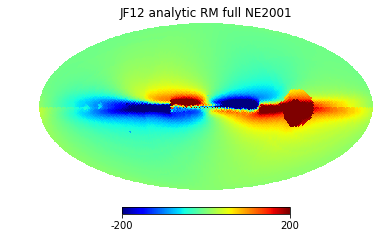

In [10]:
mapsJFRM=ham.get_observables()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
hp.mollview(mapsJFRM['RM'],min=-200,max=200,title='JF12 analytic RM full NE2001',hold=True,cmap=cmap)

# Help

Get help for the module:

In [11]:
help('hampy')

Help on module hampy:

NAME
    hampy - (A modification of a hammurabi interface originally written by T. Steininger.)

FILE
    /Users/tjaffe/space/sw/hammurabi/hammurabicode-code/hampy/hampy.py

DESCRIPTION
    Use as in:  
    
    #  Define some parameters:
    In []: myparams={"B_field_type":6,"B_field_coherent_inp":"../inputs/box_radio_loops.bin","B_field_nx":200,"B_field_ny":200,"B_field_nz":200,"B_field_lx":5,"B_field_ly":5,"B_field_lz":5,"max_radius":3,"B_field_ec":"T","TE_constant_pccm":"0.1","B_field_do_random":"F","B_field_inp_type":"double"}
    
    In []: import hampy
    #  Initialize the object with those parameters:
    In []: ham=hampy.Hampy(custom_parameters=myparams)
    
    #  Run the executable
    In []: ham.call()
    
    #  Get the observables from where they were written as FITS files in this case:
    In []: maps=ham.get_observables()
    
    #  View each one.  They are named Is, Qs, Us, Id, Qd, Ud, RM, DM, tau, ff.  
    In []: hp.mollview(maps['Is'])
  